In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

In [3]:
import tensorflow as tf
from tensorflow import keras

2023-09-18 15:20:14.284054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
train_targets.shape

(404,)

404개의 data points <br>
13개의 독립변수

In [7]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

종속변수는 미국 Boston에 속한 도시들의 70년대 중반 집들의 중간값 <br>
data point는 도시 <br>
독립변수는 범죄율, 교통 편의성 등 <br>
10 = > $ 10K

In [9]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
train_data.shape

(404, 13)

In [12]:
model = models.Sequential() #keras에서는 입력층을 따로 쌓지 않음

In [13]:
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform', input_shape=(train_data.shape[1],))) # train_data.shape[1] : feature의 개수

In [14]:
model.add(layers.Dense(64, activation = 'relu', kernel_initializer = 'glorot_uniform'))

In [15]:
model.add(layers.Dense(1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [38]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

SGD optimizer 사용하기

In [25]:
sgd= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True) # momentum 보통 0.9로 설정

In [26]:
model.compile(optimizer=sgd, loss='mse')

In [27]:
history = model.fit(train_data, train_targets, epochs=80, batch_size=64) 
# batch_size : mini-batch size 보통 2의 제곱수로 설정
# 한 epoch당 404/64 = 6.xxx번 -> 7번의 weight update가 이루어짐(64x6=384 + 20(마지막 업데이트) = 404)

Epoch 1/80
7/7 [==============================] - 1s 3ms/step - loss: 415.0500
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 56.4635
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 19.8492
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 13.3722
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 12.0315
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 11.2597
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 9.9616
Epoch 8/80
7/7 [==============================] - 0s 6ms/step - loss: 9.5579
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 9.6447
Epoch 10/80
7/7 [==============================] - 0s 4ms/step - loss: 8.9188
Epoch 11/80
7/7 [==============================] - 0s 6ms/step - loss: 8.6130
Epoch 12/80
7/7 [==============================] - 0s 6ms/step - loss: 8.5010
Epoch 13/80
7/7 [==============================] - 0s 6ms/step - 

## Loss 값 변화 살펴보기

In [28]:
import matplotlib.pyplot as plt

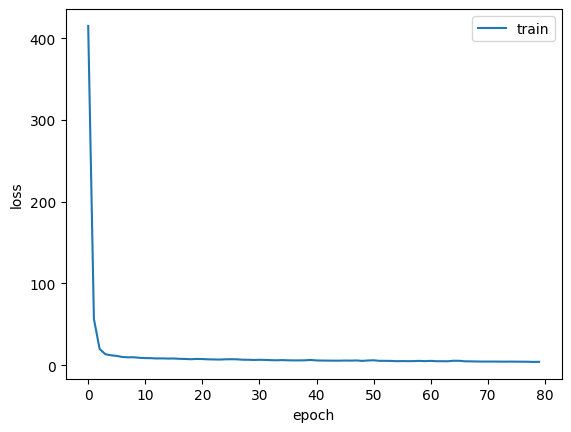

In [29]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# 성능 평가하기

In [30]:
test_data.shape

(102, 13)

In [31]:
y_pred = model.predict(test_data) # predict batch size default = 32

4/4 [==============================] - 0s 3ms/step


In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets, y_pred)**0.5

3.714447340716457

In [33]:
from sklearn.metrics import r2_score
r2_score(test_targets, y_pred)

0.8342565932223349